# 복습 
+ p.178 예제: 미국 주 데이터~

In [2]:
import pandas as pd
import numpy as np

In [4]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

In [10]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [11]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [12]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [22]:
pop.shape, areas.shape, abbrevs.shape

((2544, 4), (52, 2), (51, 2))

In [16]:
# 인구(population) DataFrame에 전체 주의 이름을 제공하는 다대일 병합
# pop의 state/region 열과 abbrevs의 abbreviation 열을 기준으로 병합, 레이블이 일치하지 않는다는 이유로 데이터가 제거되지 않도록 how='outer'를 사용
merged = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', axis=1) # 중복 정보 삭제, 열 속성 axis 지정
merged.head()

,state/region,ages,year,population,state
0,AK,total,1990,553290.0,Alaska
1,AK,under18,1990,177502.0,Alaska
2,AK,total,1992,588736.0,Alaska
3,AK,under18,1991,182180.0,Alaska
4,AK,under18,1992,184878.0,Alaska


In [17]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [18]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
1872,PR,under18,1990,NaN,NaN
1873,PR,total,1990,NaN,NaN
1874,PR,total,1991,NaN,NaN
1875,PR,under18,1991,NaN,NaN
1876,PR,total,1993,NaN,NaN


In [19]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [21]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [23]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,656425.0
1,AK,under18,1990,177502.0,Alaska,656425.0
2,AK,total,1992,588736.0,Alaska,656425.0
3,AK,under18,1991,182180.0,Alaska,656425.0
4,AK,under18,1992,184878.0,Alaska,656425.0


In [24]:
final.isnull().any

<bound method DataFrame.any of       state/region   ages   year  population  state  area (sq. mi)
0            False  False  False       False  False          False
1            False  False  False       False  False          False
2            False  False  False       False  False          False
3            False  False  False       False  False          False
4            False  False  False       False  False          False
...            ...    ...    ...         ...    ...            ...
2539         False  False  False       False  False          False
2540         False  False  False       False  False          False
2541         False  False  False       False  False          False
2542         False  False  False       False  False          False
2543         False  False  False       False  False          False

[2544 rows x 6 columns]>

+ GroupBy: 분할, 적용, 결합

In [25]:
df = pd.DataFrame({'key' : ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data' : range(6)}, columns = ['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [26]:
df.groupby('key')

In [27]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


### GroupBy 객체

+ 열 인덱싱

In [30]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [32]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [33]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [35]:
planets.groupby('method')

In [36]:
planets.groupby('method')['orbital_period']

In [37]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [38]:
planets.groupby('method')['orbital_period'].mean()

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

+ 그룹 내 반복

In [40]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


+ 디스패치 메서드(Dispatch Method)

In [45]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [41]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

+ 집계, 필터, 변환, 적용

In [44]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key' : ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1' : range(6),
                   'data2' : rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [46]:
df.groupby('key').aggregate(['min', np.median, max])

C:\Users\user\AppData\Local\Temp\ipykernel_8268\968873422.py:1: FutureWarning: The provided callable <function median at 0x00000158CBA871F0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('key').aggregate(['min', np.median, max])
C:\Users\user\AppData\Local\Temp\ipykernel_8268\968873422.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('key').aggregate(['min', np.median, max])


data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [47]:
df.groupby('key').aggregate({'data1' : 'min',
                             'data2' : 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [58]:
def filter_func(x):
    return x['data2'].std() > 4
print(df); print(df.groupby('key').std());

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641


## 피벗 테이블

In [59]:
# 피벗 테이블(pivot table)은 표 형태의 데이터로 작업하는 스프레드시트와 다른 프로그램에서 일반적으로 볼 수 있는 유사한 작업
# 입력값으로 간단한 열 단위의 데이터를 취하고 그 데이터에 대한 다차원 요약을 제공하는 2차원 테이블로 항목을 그룹핑
# 피벗 테이블을 근본적으로 GroupBy 집계의 다차원 버전

### 피벗 테이블 시작

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [61]:
# 각 승객에 대한 성별, 나이, 좌석 등급, 요금 등
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [63]:
titanic.shape

(891, 15)

### 피벗 테이블 등장 배경

In [64]:
# 성별이나 생존 여부, 또는 그 몇 가지 조합에 따라 분류

In [65]:
# 성별에 따른 생존율
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [66]:
# 결과 : 전반적으로 승선하고 있던 여성의 네 명 중 세 명이 생존한 반면, 남성은 다섯 명 중 한 명만 생존

In [69]:
# 좌석 등급과 성별 단위로 그룹을 나누고 생존율을 선택하고 평균 집계를 적용하고 결과 그룹을 결합한 후 숨겨진 다차원성을 드러내기 위해 계층적인 인덱스를 분할
titanic.groupby(['sex', 'class'], observed=True)['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [70]:
titanic.groupby(['sex', 'class'], observed=True)['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [71]:
# 결과 : Pandas는 이러한 유형의 다차원 집계를 간결하게 처리할 수 있도록 pivot_table이라는 루틴을 제공

### 피벗 테이블 구문

In [73]:
# DataFrame의 pivot_table 메서드를 사용, 앞의 연산을 동일하게 구현
titanic.pivot_table('survived', index='sex', columns='class', observed=True)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [74]:
# 결과 : 여성이면서 좌석 등급이 높을 수록 생존율이 높아지는 경향, 1등석에 탄 여성은 거의 확실하게 생존했지만, 3등석에 탄 남성은 열 명 중 한 명만 생존

+ 다단계 피벗 테이블

In [76]:
# GroupBy 에서와 마찬가지로 피벗 테이블의 그룹핑은 다단계로 여러 가지 옵션을 통해 지정 가능

In [78]:
# 세 번째 차원으로 연령을 보고 싶을 떄, pd.cut 함수 사용해 연령 추가
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class', observed=True)

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [97]:
# 자동으로 분위 수를 계산하기 위해 pd.qcut를 사용해 지불된 비용에 대한 정보를 추가
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'], observed=True).fillna(0) # fillna(0) 널값 0으로 대치

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               0.0  1.000000  0.714286          0.909091   
       (18, 80]              0.0  0.880000  0.444444          0.972973   
male   (0, 18]               0.0  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [84]:
# 결과 : 값 사이의 관계를 보여주는 그리드에 나타난 계층적 인덱스를 가진 4차원 집계

+ 기타 피벗 테이블 옵션

In [87]:
# DataFrame의 pivot_table 메서드의 전체 호출 시그니처
# Pandas 0.19 버전 기준 호출 시그니처
# DataFrame.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='ALL)

In [88]:
# aggfunc 키워드는 어떤 유형의 집계를 적용할지 제어하며 기본으로는 평균이 적용
# GroupBy에서와 마찬가지로 적용할 집계 연산은 몇 가지 일반적인 방식 중 하나를 표현하는 문자열('sum', 'mean', 'count', 'min', 'max' 등)이나
# 집계를 구하는 함수(np.sum(), min(), sum() 등)로 지정 가능
# 열을 원하는 집계 방식에 매핑한 딕셔너리로 지정 가능

In [95]:
titanic.pivot_table(index='sex', columns='class', observed=True, aggfunc={'survived':'sum', 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [ ]:
# 결과 : values 키워드는 생략, aggfunc을 위한 매핑을 지정할 떄 이 키워드가 자동으로 결정

In [96]:
# 그룹별 총합을 계산, margins 키워드
titanic.pivot_table('survived', index='sex', columns='class', margins=True, observed=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [98]:
# 결과 : 좌석 등급과 무관한 성별에 따른 생존율과 성별과 무관한 좌석 등급별 생존율, 그리고 38%라는 전체 생존율을 알 수 있음
# 가장자리 열과 행의 명칭은 margins_name 키워드로 지정 가능, default = 'All' 표시

### 예제: 출생률 데이터

In [99]:
# 질병 대책 본부에서 제공하고 자유룝게 사용할 수 있는 미국의 출생률 데이터
births = pd.read_csv('data/births.csv')

In [101]:
# 날짜와 성별로 분류한 출생 수
births.head(), births.shape

(   year  month  day gender  births
 0  1969      1  1.0      F    4046
 1  1969      1  1.0      M    4440
 2  1969      1  2.0      F    4454
 3  1969      1  2.0      M    4548
 4  1969      1  3.0      F    4548,
 (15547, 5))

In [102]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [103]:
# 연대 열을 추가하고 연대별 남녀의 출생 수, decade 함수 사용
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [104]:
# 결과 : 연대마다 항상 남성의 출생률이 여서보다 높았음

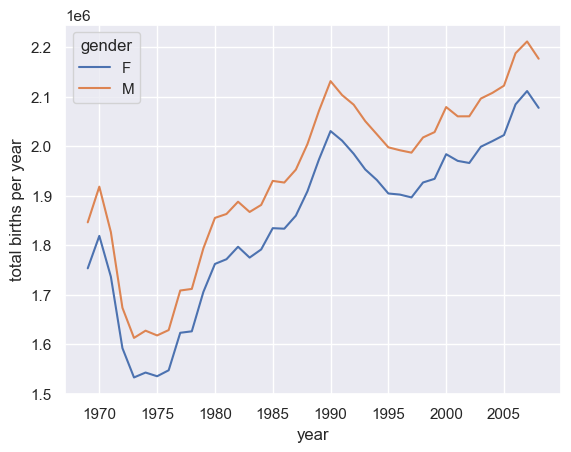

In [106]:
# Pandas에서 기본적으로 제공하는 플로팅 도구를 활용해 연도별 출생 수를 시각화
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # Seaborn 스타일 사용
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [107]:
# 결과 : 성별에 따른 연도별 술생 수의 추이를 확인, 지난 50년 동안 남성의 출생 수가 여성보다 5% 정도 더 높았음

In [108]:
# 데이터 정재, 날짜 오타(EX:June 31st)나 누락된 값(ex:June 99th)으로 인한 이상치를 제거
# 시그마 클리핑 연산

In [109]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0]) # 표본 평균의 견고한 추정치, 0.74는 가우스 분포의 사분위 수

In [110]:
# query() 메서드를 사용해 이 값에서 벗어난 출생 수를 가진 행을 거러냄
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

### 이후 생략 점프 -> p.219

### 시계열 다루기

### 파이썬에서의 날짜와 시간

+ 기본 파이썬 날짜와 시간: datetime과 dateutil

In [163]:
from datetime import datetime
datetime(year=2024, month=7, day=1)

datetime.datetime(2024, 7, 1, 0, 0)

In [164]:
from dateutil import parser
date = parser.parse("1th of July, 2024")
date

datetime.datetime(2024, 7, 1, 0, 0)

In [165]:
date.strftime('%A')

'Monday'

In [175]:
date_str = '2024-07-01'
datetime.datetime.strptime(date_str, '%Y-%m-%d')

datetime.datetime(2024, 7, 1, 0, 0)

+ 타입이 지정된 시간 배열: NumPy의 datetime64

In [166]:
import numpy as np
date = np.array('2024-07-01', dtype=np.datetime64)
date

array('2024-07-01', dtype='datetime64[D]')

In [167]:
date + np.arange(12)

array(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04',
       '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08',
       '2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12'],
      dtype='datetime64[D]')

In [178]:
now = np.datetime64('now')
now

numpy.datetime64('2024-07-01T07:28:39')

In [180]:
now + np.timedelta64(1, 'D')

numpy.datetime64('2024-07-02T07:28:39')

In [181]:
np.array([1, 2, 3]) + 5

array([6, 7, 8])

In [186]:
day = np.array('2024-07-01', dtype=np.datetime64)

In [187]:
day + np.arange(10)

array(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04',
       '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08',
       '2024-07-09', '2024-07-10'], dtype='datetime64[D]')

In [168]:
np.datetime64('2024-07-01')

numpy.datetime64('2024-07-01')

In [169]:
np.datetime64('2024-07-01 16:00')

numpy.datetime64('2024-07-01T16:00')

In [170]:
np.datetime64('2024-07-01 16:59:59.50', 'ns')

numpy.datetime64('2024-07-01T16:59:59.500000000')

+ Pandas에서의 날짜와 시간: 두 세계의 최선

In [171]:
import pandas as pd
date = pd.to_datetime('1th of July, 2024')
date

Timestamp('2024-07-01 00:00:00')

In [172]:
date.strftime('%A')

'Monday'

In [174]:
import datetime

In [124]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04',
               '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08',
               '2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12'],
              dtype='datetime64[ns]', freq=None)

### Pandas 시계열: 시간으로 인덱싱하기

In [125]:
index = pd.DatetimeIndex(['2024-07-01', '2024-08-01',
                          '2025-07-01', '2025-08-01'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2024-07-01    0
2024-08-01    1
2025-07-01    2
2025-08-01    3
dtype: int64

In [126]:
data['2024-07-01':'2025-07-01']

2024-07-01    0
2024-08-01    1
2025-07-01    2
dtype: int64

In [127]:
data['2025']

2025-07-01    2
2025-08-01    3
dtype: int64

### Pandas 시계열 데이터 구조

In [191]:
# 기본적인 Pandas 데이터 구조

# 타임스탬프(time stamp)의 경우, Pandas는 Timestamp 타입을 제공, 파이썬의 기본 datetime의 대체 타입이지만 좀 더 효율적인 numpy.datetime64 데이터 타입을 기반, 관련 인덱스 구조 : DatetimeIndex
# 기간(time period)의 경우, Pandas는 Period 타입을 제공, numpy.datetime64를 기반으로 고정 주파수 간격을 인코딩, 관련 인덱스 구조 : PeriodIndex
# 시간 델타 또는 지속 기간의 경우, Pandas는 Timedelta 타입을 제공, Timedelta는 파이썬의 기본 datetime, timedelta 타입의 좀 더 효율적인 대체 타입, numpy.timedelta64를 기반, 관련 인덱스 구조 : TimedeltaIndex

In [ ]:
# 날짜/시간 객체의 가장 기본 : Timestamp, DatetimeIndex 객체
# 이 클래스 객체는 직접 호출될 수 있지만, 다양한 형식을 분석 할 수 있는 pd.to_datetime() 함수를 사용하는 것이 더 일반적
# 단일 날짜를 pd.to_datetime()에 전달하면 Timestamp를 생성하고, 일련의 날짜를 전달하면 DatetimeIndex를 생성하는 것이 기본

In [129]:
dates = pd.to_datetime([datetime(2024, 7, 1), '2th of July, 2024',
                        '2024-Jul-3', '04-07-2024', '20240705'])
dates

DatetimeIndex(['2024-07-01', '2024-07-02', '2024-07-03', '2024-04-07',
               '2024-07-05'],
              dtype='datetime64[ns]', freq=None)

In [132]:
dates.to_period('D')

PeriodIndex(['2024-07-01', '2024-07-02', '2024-07-03', '2024-04-07',
             '2024-07-05'],
            dtype='period[D]')

In [133]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days', '-85 days', '4 days'], dtype='timedelta64[ns]', freq=None)

### 정규 시퀀스: pd.date_range()

In [134]:
pd.date_range('2024-07-01', '2024-07-10')

DatetimeIndex(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04',
               '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08',
               '2024-07-09', '2024-07-10'],
              dtype='datetime64[ns]', freq='D')

In [135]:
pd.date_range('2024-07-01', periods=8)

DatetimeIndex(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04',
               '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08'],
              dtype='datetime64[ns]', freq='D')

In [137]:
pd.date_range('2024-07-01', periods=8, freq='h')

DatetimeIndex(['2024-07-01 00:00:00', '2024-07-01 01:00:00',
               '2024-07-01 02:00:00', '2024-07-01 03:00:00',
               '2024-07-01 04:00:00', '2024-07-01 05:00:00',
               '2024-07-01 06:00:00', '2024-07-01 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [138]:
pd.period_range('2024-07-01', periods=8, freq='M')

PeriodIndex(['2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12',
             '2025-01', '2025-02'],
            dtype='period[M]')

In [139]:
pd.timedelta_range(0, periods=10, freq='h')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='h')

### 주기와 오프셋

In [145]:
pd.timedelta_range(0, periods=9, freq='2h30min')

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150min')

In [195]:
from pandas.tseries.offsets import BDay
pd.date_range('2024-07-01', periods=5, freq='B')

DatetimeIndex(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04',
               '2024-07-05'],
              dtype='datetime64[ns]', freq='B')

In [197]:
pd.date_range(start='2024', end='2025')

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
               '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30',
               '2024-12-31', '2025-01-01'],
              dtype='datetime64[ns]', length=367, freq='D')

In [198]:
pd.date_range(start='2024-02', end='2024-03')

DatetimeIndex(['2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04',
               '2024-02-05', '2024-02-06', '2024-02-07', '2024-02-08',
               '2024-02-09', '2024-02-10', '2024-02-11', '2024-02-12',
               '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16',
               '2024-02-17', '2024-02-18', '2024-02-19', '2024-02-20',
               '2024-02-21', '2024-02-22', '2024-02-23', '2024-02-24',
               '2024-02-25', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01'],
              dtype='datetime64[ns]', freq='D')

In [200]:
df = pd.DataFrame(np.random.randn(365, 4),
                  index=pd.date_range(start='2024-07-01', end='2025-06-30'),
                  columns=['s1', 's2', 's3', 's4'])
df

,s1,s2,s3,s4
2024-07-01,1.983834,1.105653,-1.535540,-0.523172
2024-07-02,-0.243438,0.726823,-0.699455,0.502661
2024-07-03,0.110171,0.686063,-0.798645,1.513178
2024-07-04,-0.673744,0.626804,1.051664,-0.545325
2024-07-05,-0.155746,1.640942,1.025513,0.701041
...,...,...,...,...
2025-06-26,-0.065629,1.838318,-0.336319,1.935099
2025-06-27,-0.979352,-0.685542,-1.745293,0.981437
2025-06-28,1.157235,0.818922,-1.246402,-0.170877
2025-06-29,2.751303,2.250409,-0.977756,-1.810956


In [201]:
df.loc['2024-07':'2024-08']

,s1,s2,s3,s4
2024-07-01,1.983834,1.105653,-1.535540,-0.523172
2024-07-02,-0.243438,0.726823,-0.699455,0.502661
2024-07-03,0.110171,0.686063,-0.798645,1.513178
2024-07-04,-0.673744,0.626804,1.051664,-0.545325
2024-07-05,-0.155746,1.640942,1.025513,0.701041
...,...,...,...,...
2024-08-27,-1.390462,-0.452983,0.926340,0.507578
2024-08-28,-0.843225,-0.065540,0.826081,0.085599
2024-08-29,-1.650458,-0.372365,0.801991,0.851510
2024-08-30,-0.379009,-0.664742,0.199369,-0.473785


In [202]:
df.index.to_period('M')

PeriodIndex(['2024-07', '2024-07', '2024-07', '2024-07', '2024-07', '2024-07',
             '2024-07', '2024-07', '2024-07', '2024-07',
             ...
             '2025-06', '2025-06', '2025-06', '2025-06', '2025-06', '2025-06',
             '2025-06', '2025-06', '2025-06', '2025-06'],
            dtype='period[M]', length=365)

In [203]:
df.index - df.index[0]

TimedeltaIndex([  '0 days',   '1 days',   '2 days',   '3 days',   '4 days',
                  '5 days',   '6 days',   '7 days',   '8 days',   '9 days',
                ...
                '355 days', '356 days', '357 days', '358 days', '359 days',
                '360 days', '361 days', '362 days', '363 days', '364 days'],
               dtype='timedelta64[ns]', length=365, freq='D')

### 리샘플링, 시프팅, 윈도잉

In [152]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.8 MB 7.4 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.8 MB 7.5 MB/s eta 0:00:01
   ------------------- -------------------- 0.9/1.8 MB 7.8 MB/s eta 0:00:01
   --------------------------- ------------ 1.2/1.8 MB 7.1 MB/s eta 0:00:01
   ------------------------------------- -- 1.7/1.8 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1
    Uninstalling pip-24.1:
      Successfully uninstalled pip-24.1
Note: you may need to restart the kernel to use updated packages.


In [153]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [156]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     -- ------------------------------------- 0.2/3.0 MB 4.4 MB/s eta 0:00:01
     ------- -------------------------------- 0.6/3.0 MB 6.0 MB/s eta 0:00:01
     ------------ --------------------------- 1.0/3.0 MB 6.7 MB/s eta 0:00:01
     ----------------- ---------------------- 1.3/3.0 MB 7.3 MB/s eta 0:00:01
     --------------------- ------------------ 1.6/3.0 MB 6.9 MB/s eta 0:00:01
     ---------------------- ----------------- 1.7/3.0 MB 6.3 MB/s eta 0:00:01
     -------------------------- ------------- 1.9/3.0 MB 6.1 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 6.3 MB/s eta 0:00:01
     ----------------------------------- ---- 2.6/3.0 MB 6.2 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 6.4 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 6.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencie

In [230]:
import pandas as pd
from pandas_datareader import data
import yfinance as yf

yf.pdr_override()
sp500 = data.DataReader('^GSPC', start='2020-01-01', end='2024-07-01')

sp500.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000


In [231]:
sp500 = sp500['Close']

<Axes: xlabel='Date'>

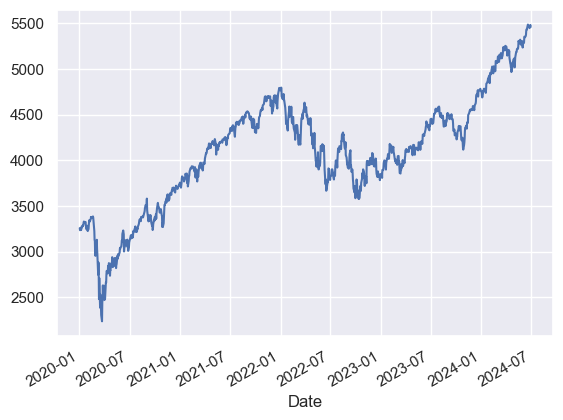

In [232]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
sp500.plot()

In [224]:
import yfinance as yf

ticker = '^GSPC'

sp500 = yf.download(ticker, start="2020-01-01", end="2024-06-30")

sp500

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000
...,...,...,...,...,...,...
2024-06-24,5459.580078,5490.660156,5447.589844,5447.870117,5447.870117,3696750000
2024-06-25,5460.729980,5472.879883,5446.560059,5469.299805,5469.299805,3591960000
2024-06-26,5460.709961,5483.140137,5451.870117,5477.899902,5477.899902,3563920000


In [225]:
def create_sequences(data, seq_length, predict_steps):

    sequences = []

    for i in range(len(data) - seq_length - predict_steps + 1):

        seq = data[i:i + seq_length]

        label = data[i + seq_length:i + seq_length + predict_steps]

        sequences.append((seq, label))

    return sequences



seq_length = 30

predict_steps = 5



data = sp500['Close'].values

sequences = create_sequences(data, seq_length, predict_steps)

+ 리샘플링 및 주기 변경

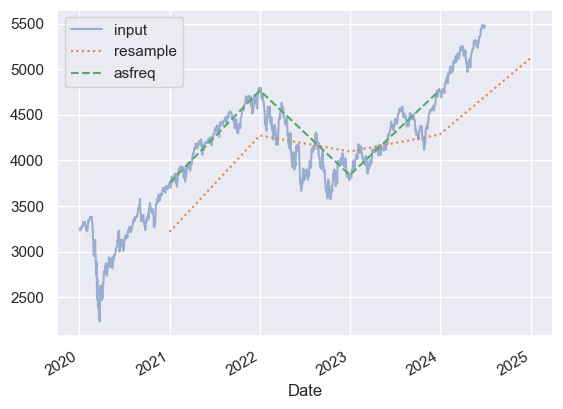

In [235]:
sp500.plot(alpha=0.5, style='-')
sp500.resample('BYE').mean().plot(style=':')
sp500.asfreq('BYE').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

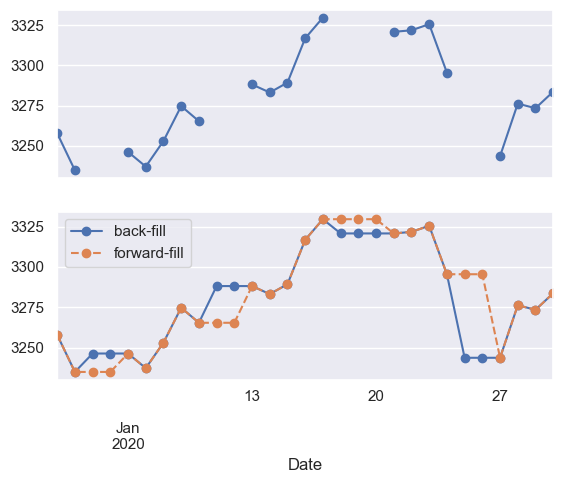

In [236]:
fig, ax = plt.subplots(2, sharex=True)
data = sp500.iloc[:20]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

+ 시간 이동(Time-shift)

In [241]:
sp500.shift(-365)

Date
2020-01-02    3756.070068
2020-01-03    3756.070068
2020-01-04    3756.070068
2020-01-05    3700.649902
2020-01-06    3726.860107
                 ...     
2024-06-24            NaN
2024-06-25            NaN
2024-06-26            NaN
2024-06-27            NaN
2024-06-28            NaN
Freq: D, Name: Close, Length: 1640, dtype: float64

In [242]:
ROI = (sp500.shift(-365) - sp500) / sp500
ROI

Date
2020-01-02    0.152929
2020-01-03    0.161126
2020-01-04    0.161126
2020-01-05    0.143994
2020-01-06    0.148040
                ...   
2024-06-24         NaN
2024-06-25         NaN
2024-06-26         NaN
2024-06-27         NaN
2024-06-28         NaN
Freq: D, Name: Close, Length: 1640, dtype: float64

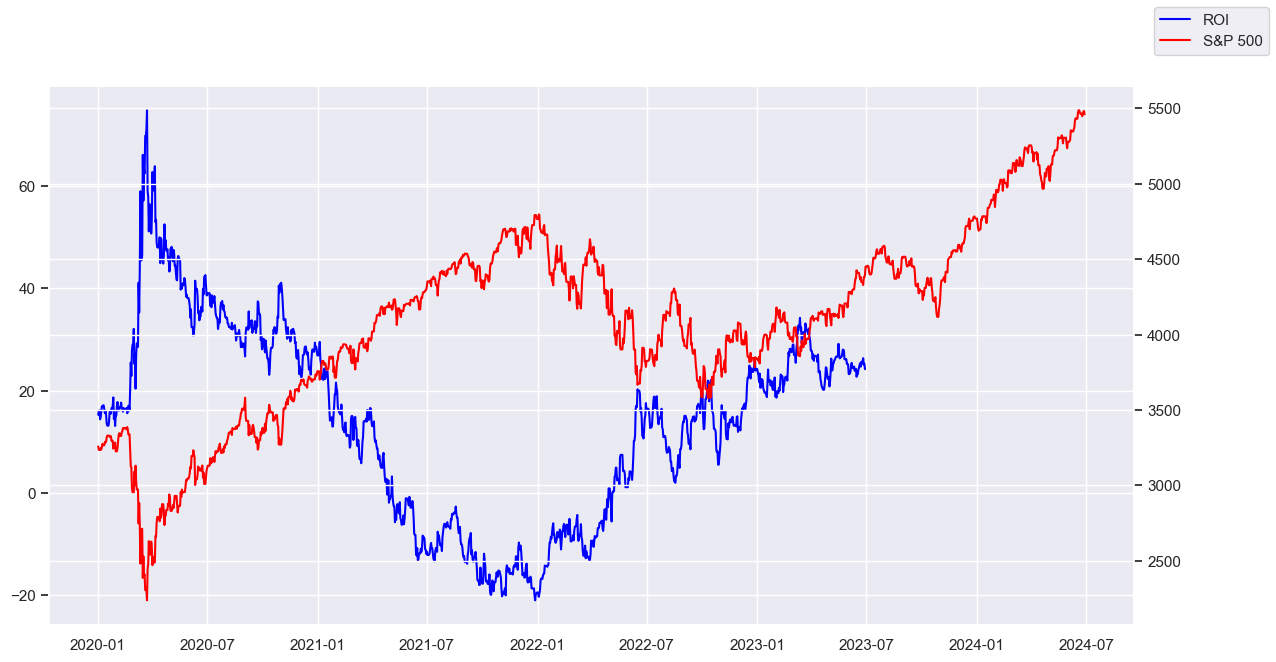

In [245]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(ROI.index, ROI, color='blue', label='ROI')

ax2 = ax1.twinx()

ax2.plot(sp500.index, sp500, color='red', label='S&P 500')

fig.legend()

Text(0, 0.5, '% Return on OInvestment after 1 year')

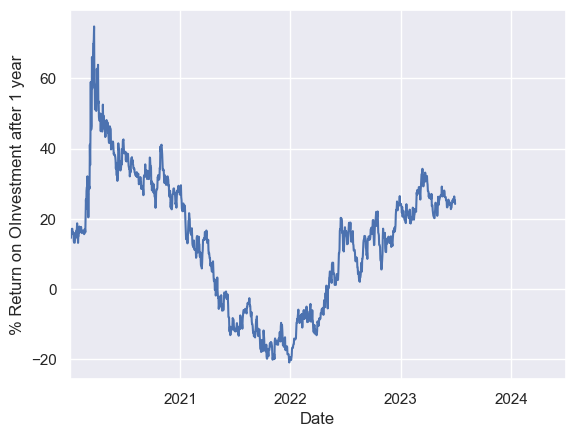

In [243]:
sp500 = sp500.asfreq('D', method='pad')

ROI = 100 * (sp500.shift(-365) - sp500) / sp500
ROI.plot()
plt.ylabel('% Return on OInvestment after 1 year')

+ 롤링 윈도우(rolling windows)

In [247]:
sp500.rolling(window=5).mean()

Date
2020-01-02            NaN
2020-01-03            NaN
2020-01-04            NaN
2020-01-05            NaN
2020-01-06    3241.736084
                 ...     
2024-06-24    5462.980078
2024-06-25    5462.206055
2024-06-26    5464.862012
2024-06-27    5468.512012
2024-06-28    5467.683984
Freq: D, Name: Close, Length: 1640, dtype: float64

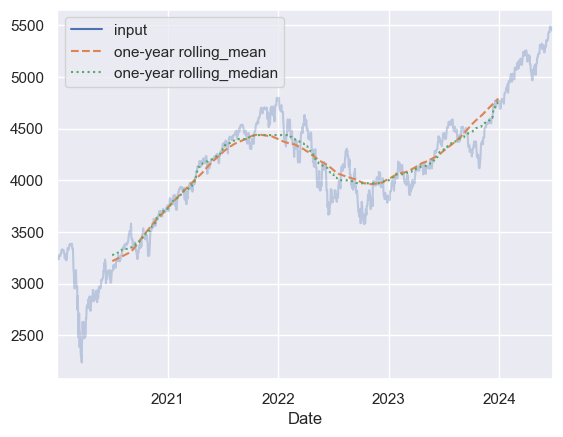

In [239]:
# S&P 500 인덱스의 1년 중심 롤링 평균과 표준 편차
rolling = sp500.rolling(window=365, center=True)

data = pd.DataFrame({'input' : sp500,
                     'one-year rolling_mean' : rolling.mean(),
                     'one-year rolling_median' : rolling.median()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

### 예제: 시애틀 자전거 수 시각화

In [267]:
# 인덱스로 Date를 사용, 이 날짜를 자동 분석하는 것으로 지정
df = pd.read_csv('https://raw.githubusercontent.com/DataScienceWorks/PredictingBicycleTraffic/master/data/FremontBridge.csv', index_col='Date', parse_dates=True)
df.sum
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_8268\3983321157.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('https://raw.githubusercontent.com/DataScienceWorks/PredictingBicycleTraffic/master/data/FremontBridge.csv', index_col='Date', parse_dates=True)


,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [271]:
df['Total'] = df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk']

In [272]:
df.columns

Index(['Fremont Bridge East Sidewalk', 'Fremont Bridge West Sidewalk',
       'Total'],
      dtype='object')

In [274]:
new_order = ['Total', 'Fremont Bridge East Sidewalk', 'Fremont Bridge West Sidewalk']  # 원하는 새로운 열 순서
df = df[new_order]

In [276]:
df.columns = ['Total', 'West', 'East']

In [277]:
df.head()

,Total,West,East
Date,,,
2012-10-03 00:00:00,13.0,9.0,4.0
2012-10-03 01:00:00,10.0,6.0,4.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,3.0,2.0
2012-10-03 04:00:00,7.0,1.0,6.0


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50328 entries, 2012-10-03 00:00:00 to 2018-06-30 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   50319 non-null  float64
 1   West    50319 non-null  float64
 2   East    50319 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


In [278]:
df.dropna().describe()

,Total,West,East
count,50319.000000,50319.000000,50319.000000
mean,109.875077,56.934399,52.940678
std,138.526584,82.835585,68.728939
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,60.000000,28.000000,29.000000
75%,143.000000,69.000000,70.000000
max,957.000000,717.000000,698.000000


+ 데이터 시각화하기

Text(0, 0.5, 'Hourly Bicycle Count')

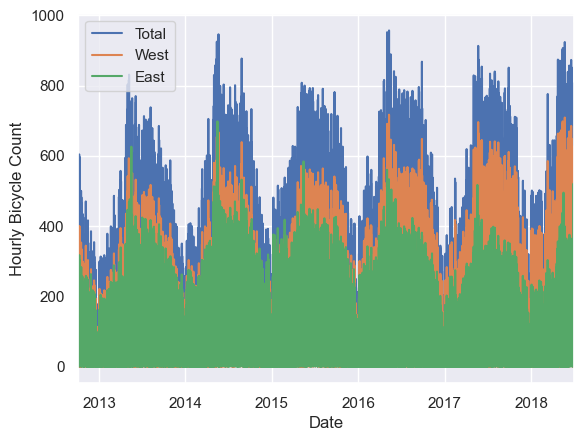

In [279]:
df.plot()
plt.ylabel('Hourly Bicycle Count')

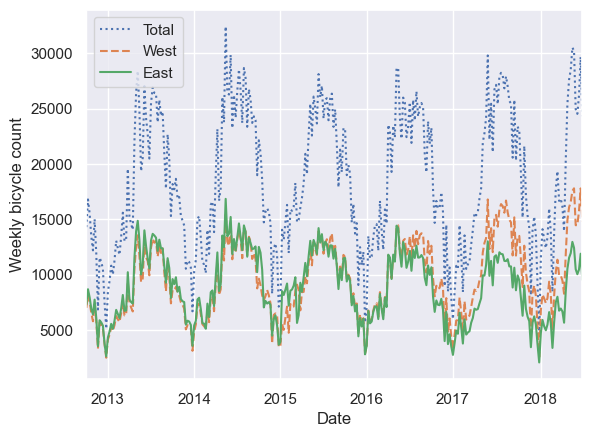

In [285]:
weekly = df.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

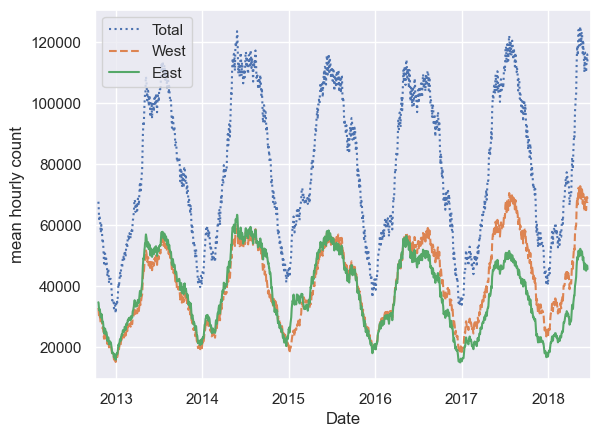

In [286]:
daily = df.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()